## I denna kodcell placeras modulimporter och egendefinerade funktioner som används i flera deluppgifter

In [1]:
# Läser in modulerna CSV och matplotlib(döper om till plt för förenkling)
import csv
import matplotlib.pyplot as plt

## Deluppgift 1
Ev. kommentar:

In [2]:
"A"
def read_file(file_name): # Skapar programmet med rätt namn på funktion och 
    data = [] # Lista för att lagra datan
    with open(file_name, 'r', encoding='utf-8-sig') as file: # Läser data i filen med UTF-8(med BOM)
        reader = csv.reader(file, delimiter=',') 
        for row in reader: # Lägger radvis in datan i listan
            data.append(row)
    return data # retunerar listan




"B"
WHR2Data =read_file('WHR2020-2021.csv') # Läser in filerna
WHR3Data =read_file('WHR2005-2022.csv')
WHR1Data =read_file('WHR2023.csv')

print('WHR1Data')
[print(row) for row in WHR1Data[:3]]; # Printar ut de 3 första raderna för varje dataset och lägger till ett mellanrum och titel
print('\n''WHR2Data')
[print(row) for row in WHR2Data[:3]];
print('\n''WHR3Data')
[print(row) for row in WHR3Data[:3]];



WHR1Data
['Country name', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
['Finland', '7.804', '10.792', '0.969', '71.150', '0.961', '-0.019', '0.182']
['Denmark', '7.586', '10.962', '0.954', '71.250', '0.934', '0.134', '0.196']

WHR2Data
['country', 'region', 'subregion', 'pop2023', 'growthRate', 'area', 'landAreaKm', 'density', 'densityMi', 'Rank', 'happiness2021', 'happiness2020', 'scoreDifference', 'rank']
['Finland', 'Europe', 'Northern Europe', '5545475.00', '0.00085', '338424', '303940', '182453.00', '472553.00', '118', '7.842', '7.809', '0.033', '1']
['Denmark', 'Europe', 'Northern Europe', '5910913.00', '0.00487', '43094', '40000', '1477728.00', '3827316.00', '115', '7.62', '7.646', '-0.026', '2']

WHR3Data
['country', 'year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Per

## Deluppgift 2
Ev. kommentar:

Välj en kolumn(1:7):2
 De 8 Högsta värdena i kolumn 2 ( Logged GDP per capita )
Country name                     Logged GDP per capita
+----------------------------------+-----------------------------+
| Luxembourg                       | 11.66                       |
+----------------------------------+-----------------------------+
| Singapore                        | 11.571                      |
+----------------------------------+-----------------------------+
| Ireland                          | 11.527                      |
+----------------------------------+-----------------------------+
| Switzerland                      | 11.164                      |
+----------------------------------+-----------------------------+
| United Arab Emirates             | 11.145                      |
+----------------------------------+-----------------------------+
| Norway                           | 11.088                      |
+----------------------------------+-------------------------

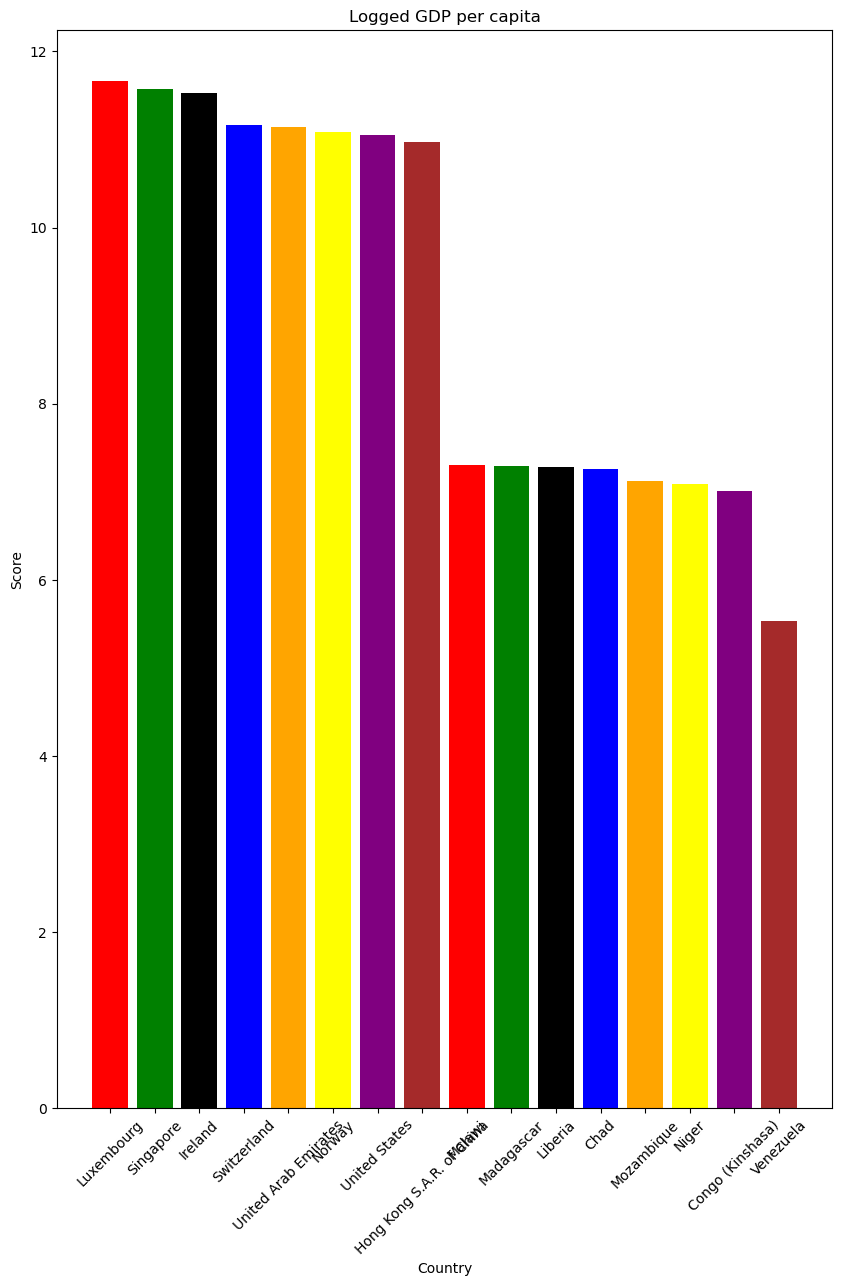

In [3]:
# funktion som ska sortera listan så störst är högst upp 
def Sortering(data):
    for i in range(0, len(data)): # Itererar genom varje element i listan
        key = float(data[i][1]) # Tar ut värdet för iterationen i
        land = data[i][0] # Landet för den iterationen
        j = i - 1
        while j >= 0 and key > float(data[j][1]): # Jämför värdet mot tidigare element
            data[j + 1] = data[j] # byter plats på elementet
            j -= 1
        data[j + 1] = (land, key) # placerar värdet på rätt plats
    return data
     
# Skapar funktionen som plockar ut bästa och sämsta
def choose_column(kolumn):
    land = [row[0] for row in WHR1Data[1:]]# plockar ut data för landnamnen och vald kolumn i separata listor
    kol = [row[kolumn] for row in WHR1Data[1:]]
    vald_column = list(zip(land, kol)) # slår ihop listorna
    
    vald_column = Sortering(vald_column) # sorterar så störst är först efter valda columnen
    
    top8= vald_column[:8] # 8 bästa länderna
    bott8= vald_column[-8:] # 8 sämsta länderna
    
    
    return top8, bott8
    
kolumn = int(input("Välj en kolumn(1:7):")) # Input för att välja kolumn att analysera
top8, bott8 = choose_column(kolumn) # anropar funktionen

print(" De 8 Högsta värdena i kolumn", kolumn, "(", WHR1Data[0][kolumn], ")") # printar tabellen
print("{:<32} {:<10}".format( WHR1Data[0][0],WHR1Data[0][kolumn])) # Titlar från orginallistan
print("+----------------------------------+-----------------------------+") # radbrytare med --- och + 
for row in top8: # Printar radvis de 8 hösta värdena 
    print("| {:<32} | {:<27} |".format(row[0], row[1]))
    print("+----------------------------------+-----------------------------+")

print("De 8 lägsta värdena i kolumn", kolumn, "(", WHR1Data[0][kolumn], ")")    
for row in bott8:  # Printar radvis de 8 lägsta värdena 
    print("| {:<32} | {:<27} |".format(row[0], row[1]))
    print("+----------------------------------+-----------------------------+") 
    
    
    
colors = ['red','green', 'black', 'blue','orange','yellow', 'purple', 'brown'] # Färgskala


topp_land = [item[0] for item in top8] # PLockar ut länderna så att de ska kunna slås ihop med de andra länderna och plottar
topp_scores = [float(item[1]) for item in top8]  # Plockar ut värdena (samma som ovan)

bott_land = [item[0] for item in bott8]
bott_scores = [float(item[1]) for item in bott8]

alla_land = topp_land + bott_land # slår ihop listorna
alla_scores = topp_scores + bott_scores

plt.figure(figsize=(10, 14)) # storlek på plott
plt.bar(range(len(alla_land)), alla_scores, tick_label=alla_land, color=colors) # Skapar låddiagrammet
plt.xlabel('Country')  # X-axel-titel
plt.ylabel('Score')  #  Y-axel-titel
plt.xticks(rotation=45) # Roterar landnamnen så de inte överlappar 
plt.title(WHR1Data[0][kolumn]) # titel för vald variabel
    
plt.show()  # Plottar diagrammet

## Deluppgift 3
Ev. kommentar: Jag har här kollat igenom efter kommentaren från kamratgranskningen jag hade missat att indexera bort kolumnnamnet när jag tog ut "land"(inget fel på sorteringen), mina siffror skiljer sig lite i statistiken jämfört med de som visas i uppgiften men är inte säker på om jag gjort fel där eller om datan skiljer sig lite mellan det som visas och labben. 
 

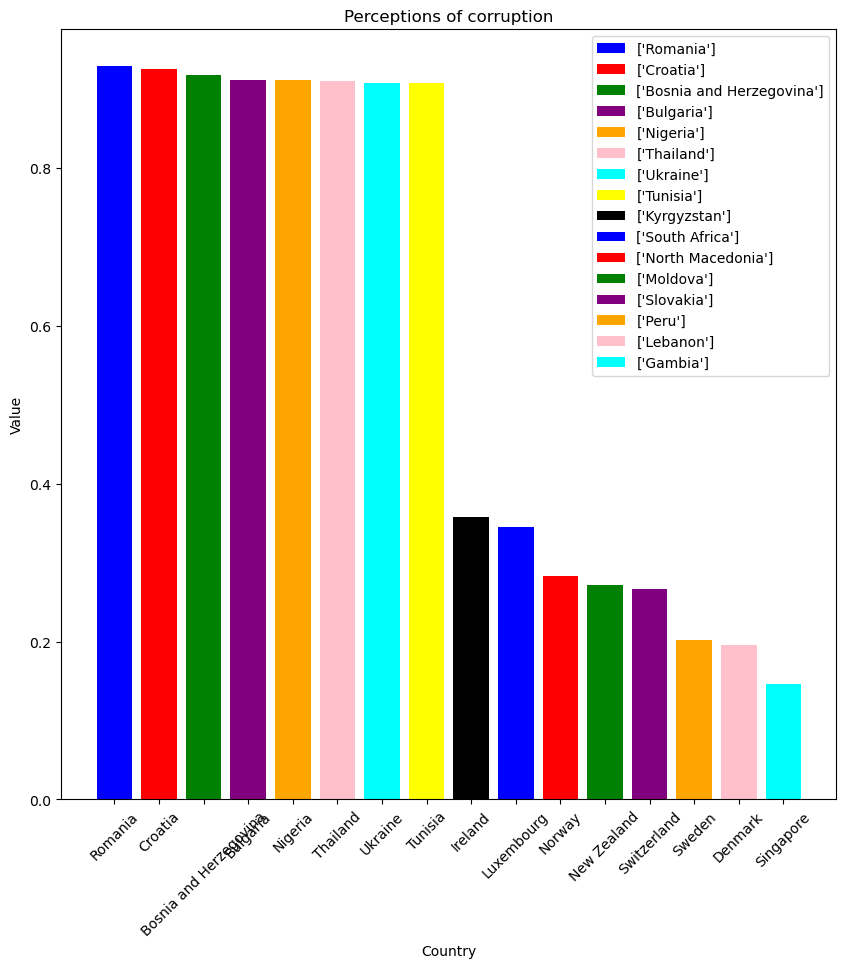

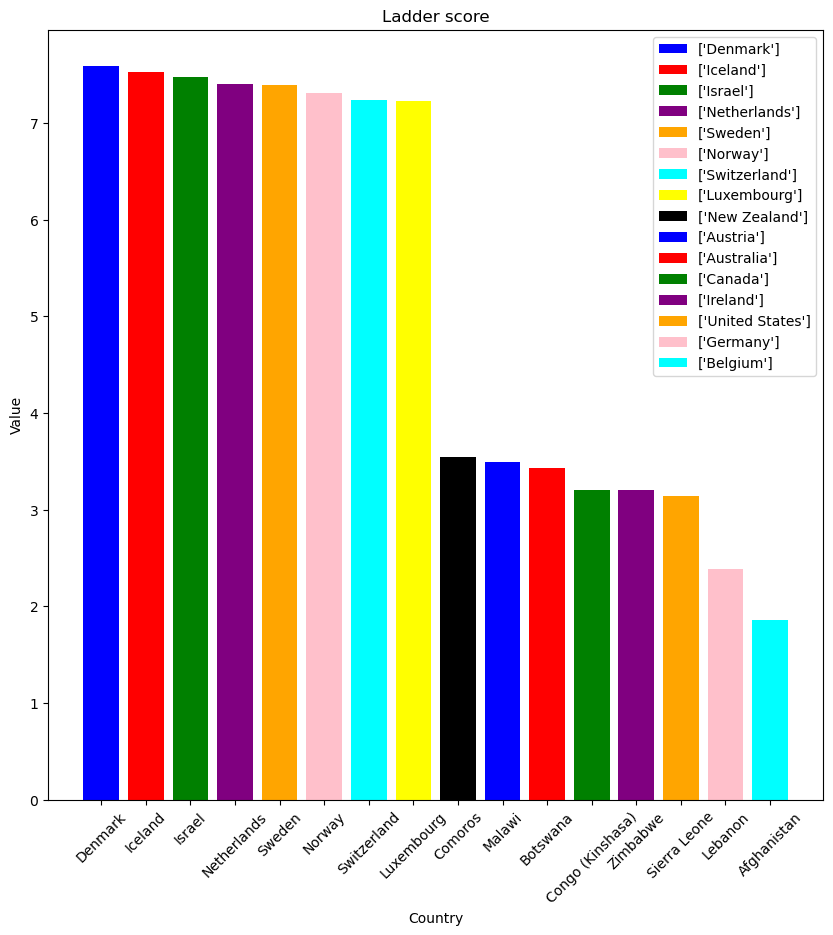

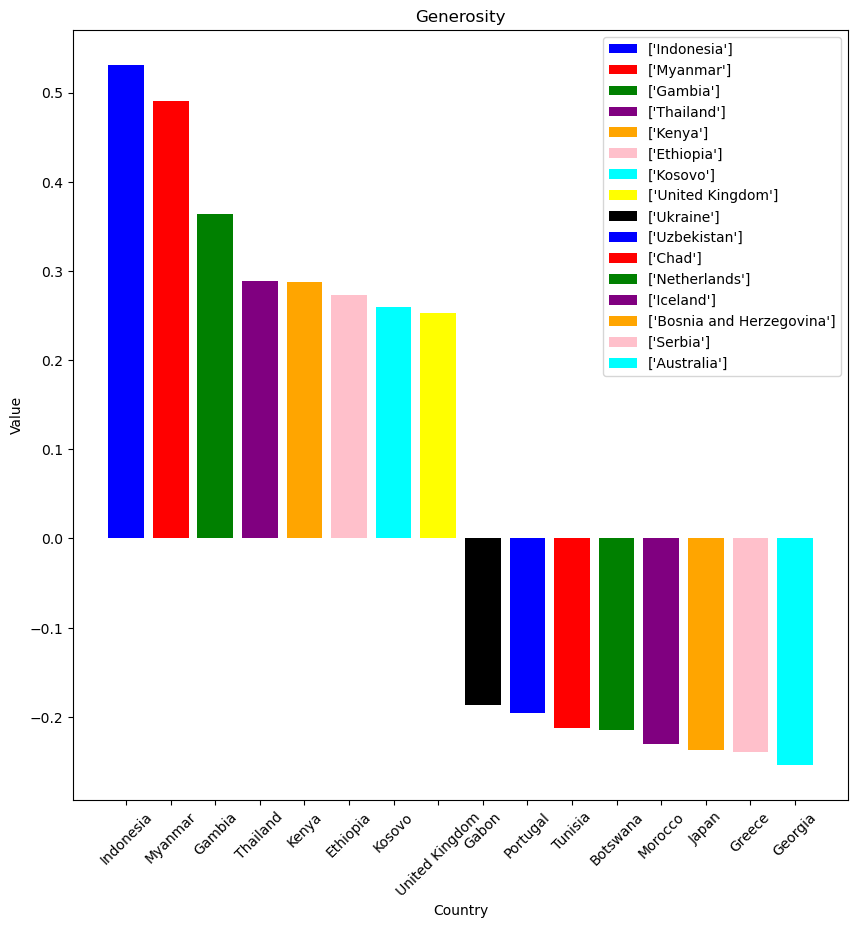

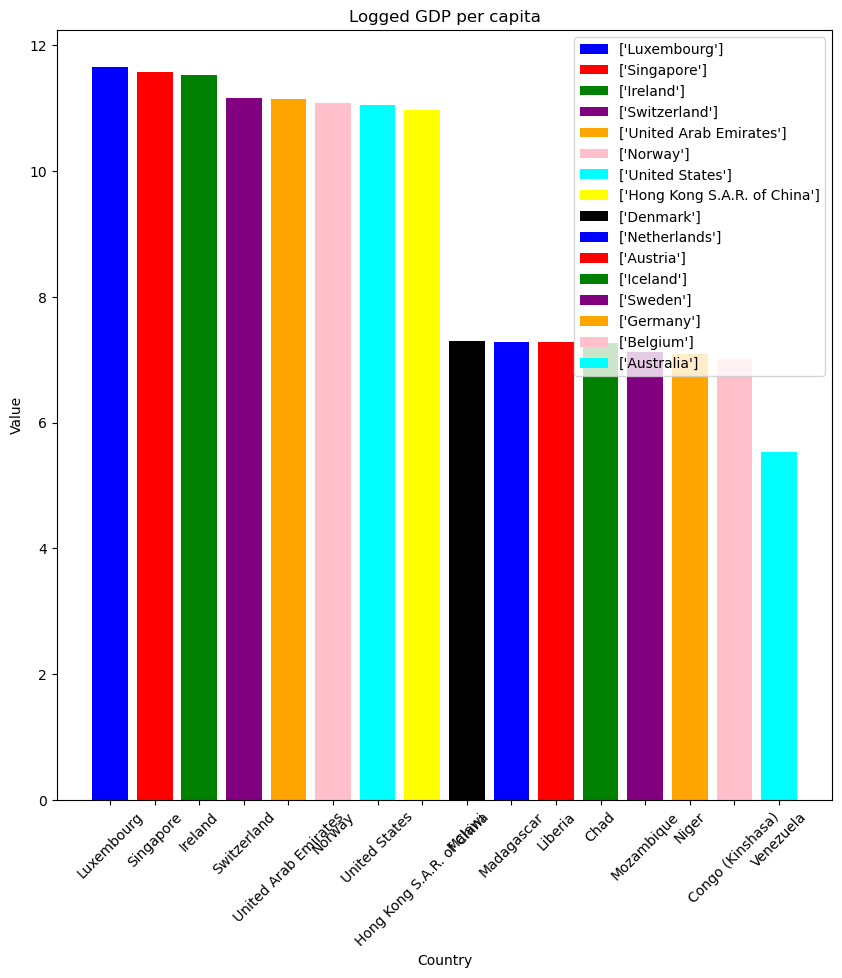

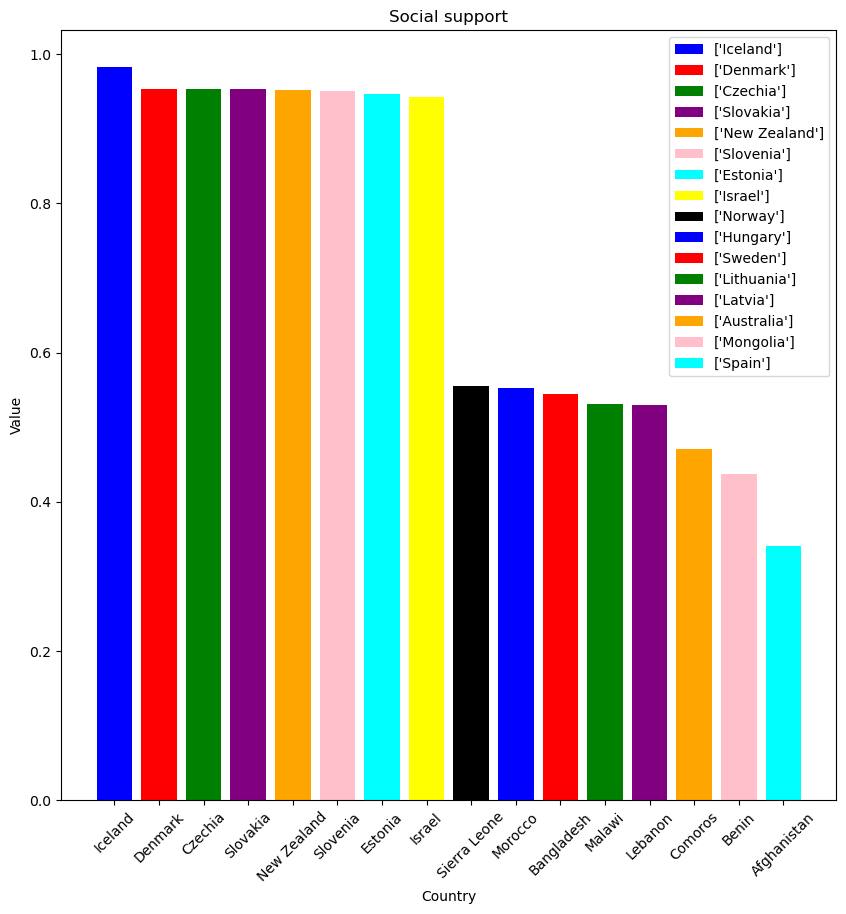

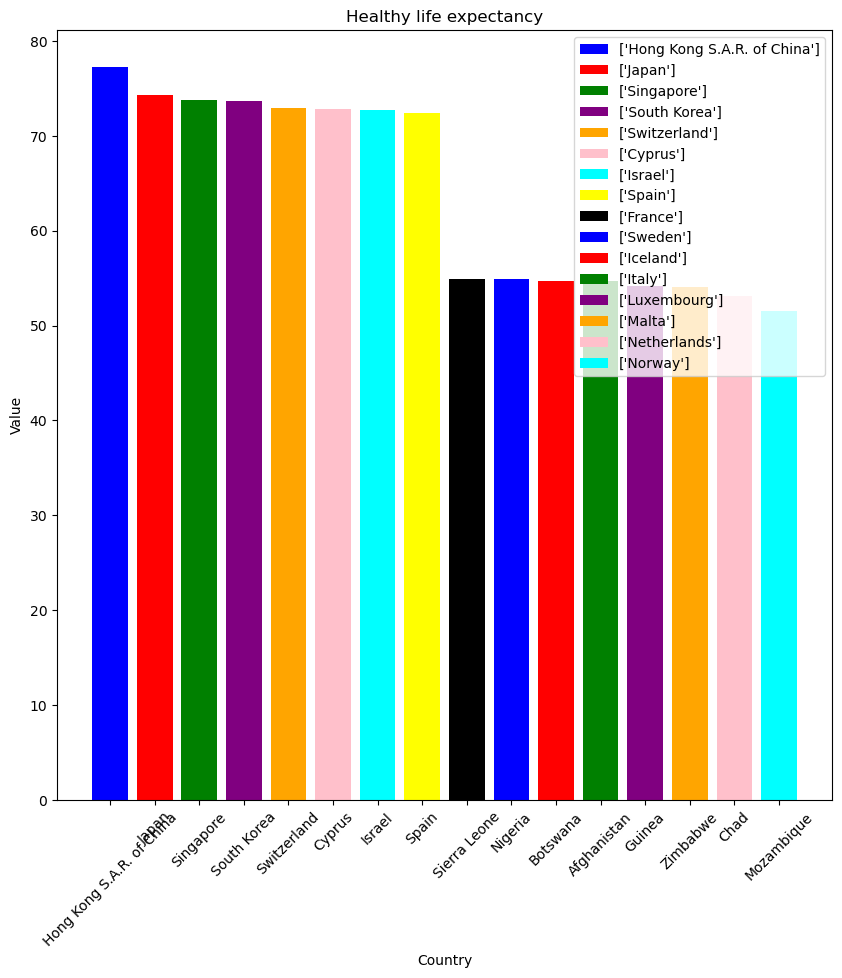

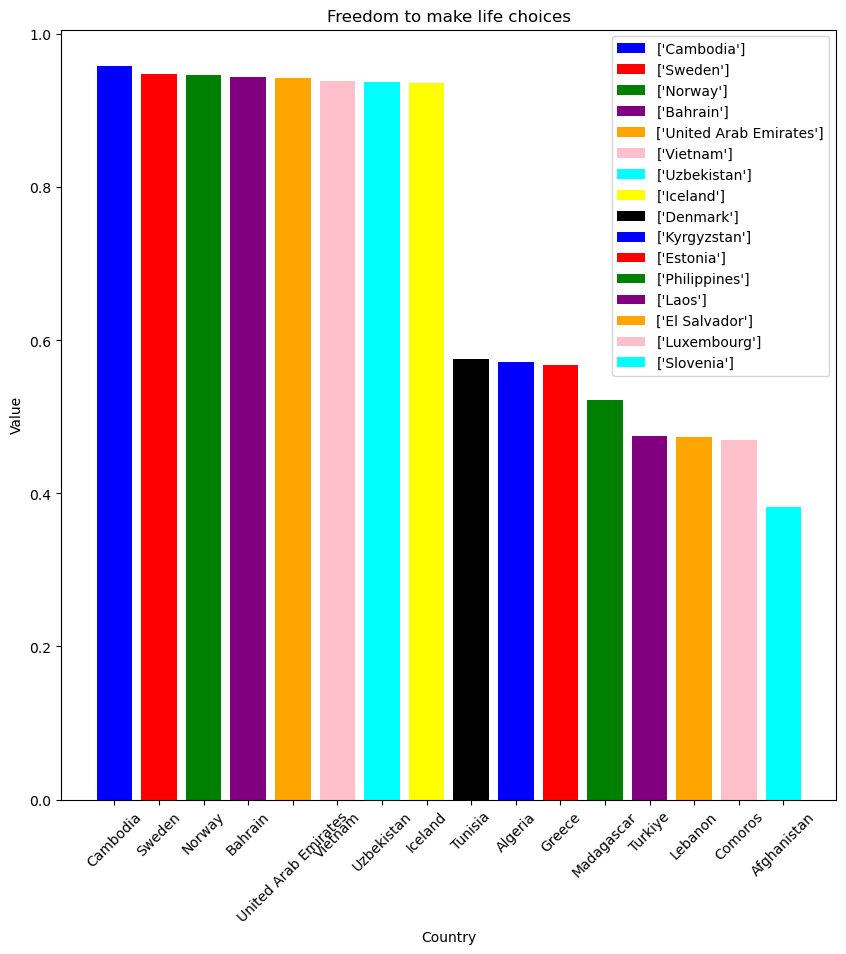

+--------------------------------+------------+---------+---------+-------+
| År 2023
+--------------------------------+------------+---------+---------+-------+
|variabel                        | medelvärde | median  |   min   | max   |
+--------------------------------+------------+---------+---------+-------+
| Perceptions of corruption      |       0.73 |    0.77 |   0.146 |   0.929
| Ladder score                   |       5.52 |    5.67 |   1.859 |   7.586
| Generosity                     |       0.02 |    0.00 |  -0.254 |   0.531
| Logged GDP per capita          |       9.44 |    9.55 |   5.527 |  11.660
| Social support                 |       0.80 |    0.83 |   0.341 |   0.983
| Healthy life expectancy        |      64.91 |   65.81 |  51.530 |  77.280
| Freedom to make life choices   |       0.79 |    0.80 |   0.382 |   0.958


In [4]:
# funktion för att ta fram statistik 
def Statistik(Data):
    column_headers = list(set(WHR1Data[0][1:]))    # Tar ut kolumnrubriker
    statistik = [] # Skapar en tom lista för att lagra resultat
   
    # Iterera över varje kolumnrubrik
    for header in column_headers:
        column_index = WHR1Data[0].index(header)# Hitta kolumnindex för aktuell rubrik
        land = [row[0] for row in WHR1Data[1:]] # Lista med länderna
        values = [float(row[column_index]) for row in WHR1Data[1:]] # Hämta värden i den kolumnen
        
        land_values = list(zip(land, values))# Slår ihop listorna
        
        sort_land_values = sorted(land_values[1:], key=lambda x: x[1], reverse=True) # Sortera värdena i kolumnen
        sort_land = [item[0] for item in sort_land_values] # Plockar ut länderna för plottar
        sort_values = [float(item[1]) for item in sort_land_values]  # Plockar ut värdena för beräkningar

        # Beräkna min-, max-, medel- och medianvärden
        mini = sort_values[-1]
        maxi = sort_values[0]
        
        total=0 # Variabel som ska summera totala antalet värden
        count=len(sort_values) # Antalet värden för att dividera för medel
        for value in sort_values: # Går igenom alla värden 
            total += value # Lägger till i total
            
        medel = total / count # Beräknar medelvärdet

        # Beräknar medianvärdet och beroende på om det är delbart med 2 eller ej så är det 2 olika beräkningar(för att hitta mitten)
        if len(sort_values) % 2 == 0:
            median = (sort_values[len(sort_values)//2 - 1] + sort_values[len(sort_values)//2]) / 2
        else:
            median = sort_values[len(sort_values)//2]

        # Lägger till resultaten i statistiklistan
        statistik.append([header, mini, maxi, medel, median])

        top8bott8 = sort_values[:8] + sort_values[-8:] # plockar ut 8 bästa och sämsta värdena och länderna
        topbot_land = sort_land[:8] + sort_land[-8:]
        
        col  = ['blue', 'red', 'green', 'purple', 'orange', 'pink', 'cyan', 'yellow','black','blue', 'red', 'green', 'purple', 'orange', 'pink', 'cyan', 'yellow','black'] # färgschema

        plt.figure(figsize=(10,10)) # skapar ett diagram
        for i in range(0,16):
            plt.bar(topbot_land[i], top8bott8[i], color=col[i], label= [sort_land[i]]) # plottar staplarna med färd och legendnamn
        # Anger axelrubriker
        plt.xlabel('Country')
        plt.ylabel('Value')
        plt.xticks(rotation=45)  # Roterar landnamnen så de inte överlappar 
        plt.legend(loc='upper right') # Lägger till legend
        plt.title(header) # titel för rätt variabel
        # Visa diagrammet
        
        plt.show()

    # Skriv ut tabellen med resultaten
    print('+--------------------------------+------------+---------+---------+-------+')
    print('| År 2023')    
    print('+--------------------------------+------------+---------+---------+-------+')
    print('|variabel                        | medelvärde | median  |   min   | max   |')
    print('+--------------------------------+------------+---------+---------+-------+')
    for stat in statistik: # Itererar ut värden för kolumnerna
        print(f'| {stat[0]:30} | {stat[3]:10.2f} | {stat[4]:7.2f} | {stat[1]:7.3f} | {stat[2]:7.3f}') # avrundar till 2 eller 3 decimaler
        
        
Statistik(WHR1Data)        


## Deluppgift 4
Ev. kommentar: Fixat legenden efter kommentar

Välj en av följande kontinenter Africa, Asia, Europe eller North America(engelska):Europe

---------------------------------------------
Medelvärde 6.39 över happiness index för länder i Europe år 2021 och 2020

Länder i Europe:

|Land                            |Score för 2021|Score för 2020|Rank |
+--------------------------------+-------------+-------------+--------+
| Finland                        |       7.842 |       7.809 |       1|
+--------------------------------+-------------+-------------+--------+
| Denmark                        |       7.620 |       7.646 |       2|
+--------------------------------+-------------+-------------+--------+
| Switzerland                    |       7.571 |       7.560 |       3|
+--------------------------------+-------------+-------------+--------+
| Iceland                        |       7.554 |       7.504 |       4|
+--------------------------------+-------------+-------------+--------+
| Netherlands                    |       7.464 |   

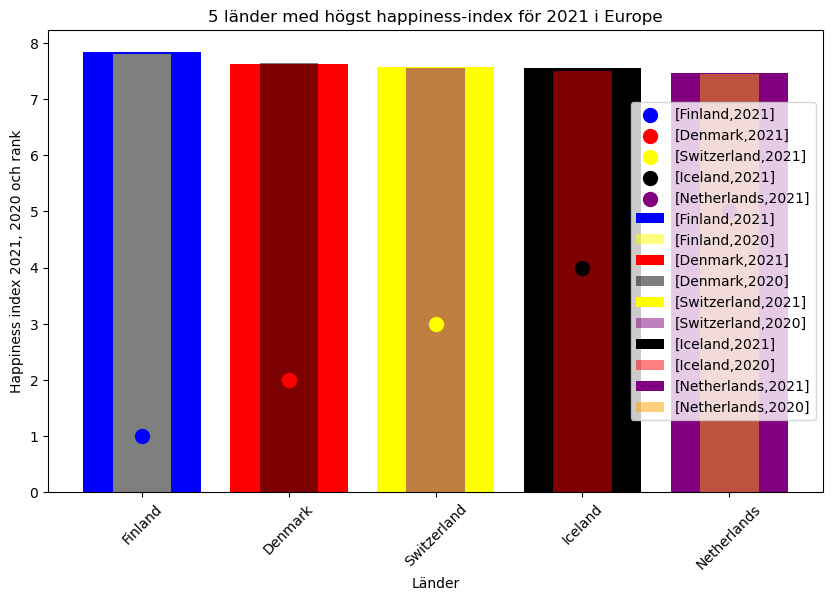

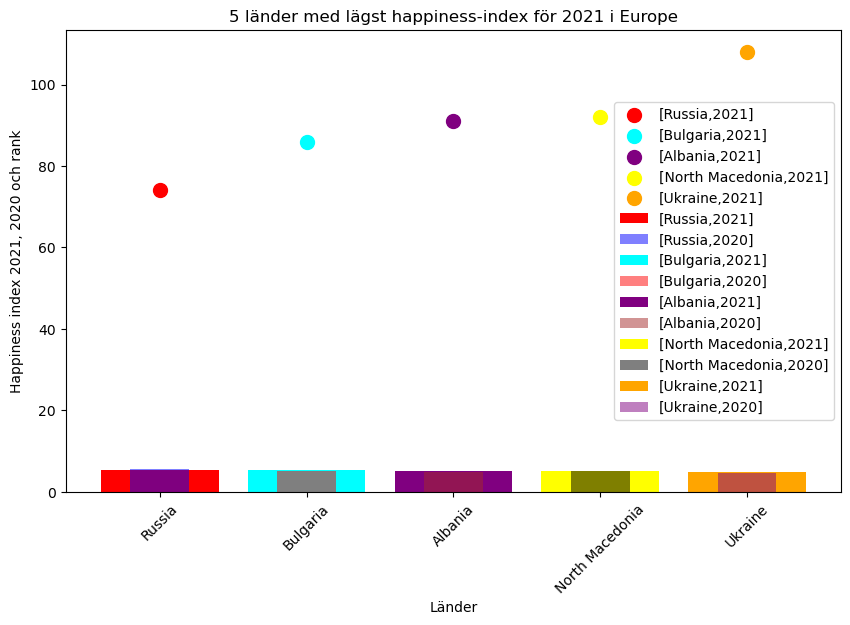

In [5]:

# Skapar funktionen med variabel kontinent där väljaren väljer en kontinent
def kontinent_data(kontinent):
    
    # Filtrerar ut den valda kontinenten 
    filt_data = []
    for kont in WHR2Data:
        if kont[1] == kontinent: # Här plockas valda koninenten ut ur data och läggs i filter_data
            filt_data.append(kont)
    
    # Skapar ny lista för att plocka ut variablerna som ska användas
    happiness_data = [] 
    for row in filt_data:
        country = row[0] # Länderna som är med
        happiness_2021 = float(row[10]) # happinessindex för båda åren
        happiness_2020 = float(row[11])
        rank = int(row[13]) # deras Rank
        happiness_data.append((country, happiness_2021, happiness_2020, rank)) # lägger in i listan
        
    # Enkel beräkning för medelvärdet(som använts tidigare)
    total = 0
    count = 0
    for row in happiness_data: # Går igenom alla värden för båda åren
        total += row[1] + row[2] # Lägger till båda åren
        count += 2 # Lägger till 2 då varje iteration tar 2 värden ovan
   
    medel = total / count # beräknar medelvärdet
    
    # Sorterar data så störst är först
    sorted_data = sorted(happiness_data, key=lambda x: x[1], reverse=True)
    
    # Skapar tabellen
    print("\n---------------------------------------------") # titlar/ rubriker från vald kontinent med mellanrum
    print(f"Medelvärde {medel:.2f} över happiness index för länder i {kontinent} år 2021 och 2020") # medelvärdet
    print("\nLänder i", kontinent + ":")
    print("\n|Land                            |Score för 2021|Score för 2020|Rank |") # variabeltitlar
    print("+--------------------------------+-------------+-------------+--------+")
    for stat in sorted_data: # Itererar ut värden för kolumnerna
        print(f'| {stat[0]:30} | {stat[1]:11.3f} | {stat[2]:11.3f} | {stat[3]:7.0f}|') # avrundat till olika antal decimaler
        print("+--------------------------------+-------------+-------------+--------+")
    
    # Plockar ut de 5 bästa och sämsta länderna
    top5 = sorted_data[:5]
    bot5 = sorted_data[-5:]
    
    # PLockar ut data för plotten
    land = [rad[0] for rad in top5] + [rad[0] for rad in bot5] # länderna som ska plottas 
    happi_2021 = [rad[1] for rad in top5] + [rad[1] for rad in bot5] # Index 2021
    happi_2020 = [rad[2] for rad in top5] + [rad[2] for rad in bot5] # index2020
    rank =  [rad[3] for rad in top5] + [rad[3] for rad in bot5] # ranken
    
    # Skapar olika färgscheman
    ferg = ['blue','red','yellow','black','purple']
    col = ['yellow', 'black','purple', 'red', 'orange']
    
    # bredd på staplarna
    width = 0.8
    
    plt.figure(figsize=(10, 6)) # Skapar plotten
    for i in range(0,5): # loop för att få in alla i legenden 
        plt.bar(land[i], happi_2021[i],width=width,color=ferg[i],label=f'[{land[i]},2021]') # barsen som ska läggas till
        plt.bar(land[i], happi_2020[i],width=width*0.5, alpha=0.5, color=col[i],label=f'[{land[i]},2020]') # halva bredden och tonar ut färgen
        plt.scatter(land[i], rank[i], s=100, c=ferg[i], label=f'[{land[i]},2021]') # Cirklarna
    plt.xticks(rotation=45) # roterar x-ticksen
    # Titlar på axlar och hela grafen
    plt.xlabel('Länder')
    plt.ylabel('Happiness index 2021, 2020 och rank')
    plt.title(f'5 länder med högst happiness-index för 2021 i {kontinent}')
    plt.legend(loc='right')
    plt.show()
    
        # Skapar olika färgscheman
    ferg = ['blue','red','yellow','black','purple','red', 'cyan','purple', 'yellow', 'orange']
    col = ['yellow', 'black','purple', 'cyan', 'orange','blue','red','brown','black','purple']
    
    
    # grafen med de 5 sämsta
    plt.figure(figsize=(10, 6)) # Skapar plotten
    for j in range(5,10):
        plt.bar(land[j], happi_2021[j],width=width,color=ferg[j],label=f'[{land[j]},2021]') # barsen som ska läggas till
        plt.bar(land[j], happi_2020[j],width=width*0.5, alpha=0.5, color=col[j],label=f'[{land[j]},2020]') # halva bredden och tonar ut färgen
        plt.scatter(land[j], rank[j], s=100, c=ferg[j], label=f'[{land[j]},2021]') # Cirklarna
    plt.xticks(rotation=45) # roterar x-ticksen
    # Titlar på axlar och hela grafen
    plt.xlabel('Länder')
    plt.ylabel('Happiness index 2021, 2020 och rank')
    plt.title(f'5 länder med lägst happiness-index för 2021 i {kontinent}')
    plt.legend(loc='best')
    plt.show()

    
    
    
    
    
kontinent = input('Välj en av följande kontinenter Africa, Asia, Europe eller North America(engelska):')
kontinent_data(kontinent)


## Deluppgift 5
Ev. kommentar:

Ange landet som ska presenteras:Sweden
Medelvärdet av 'Life Ladder' index för Sweden är: 7.4


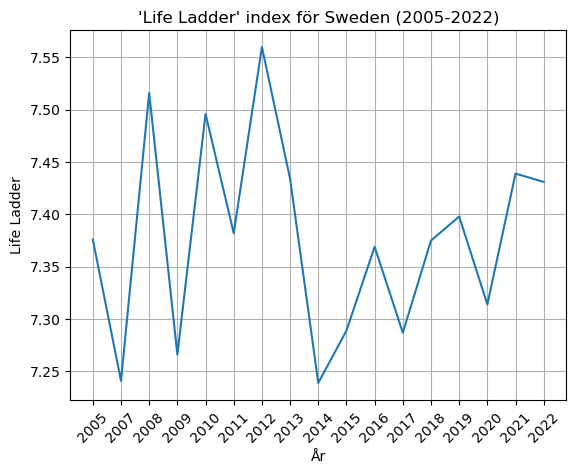

År           Score för Sweden               Förändringsfaktor   
-----------------------------------------------------------------
| 2005     |                7.376 |                -1.83
+----------+----------------------+----------------------------+
| 2007     |                7.241 |                 3.80
+----------+----------------------+----------------------------+
| 2008     |                7.516 |                -3.33
+----------+----------------------+----------------------------+
| 2009     |                7.266 |                 3.17
+----------+----------------------+----------------------------+
| 2010     |                7.496 |                -1.52
+----------+----------------------+----------------------------+
| 2011     |                7.382 |                 2.41
+----------+----------------------+----------------------------+
| 2012     |                7.560 |                -1.67
+----------+----------------------+----------------------------+
| 2013     |   

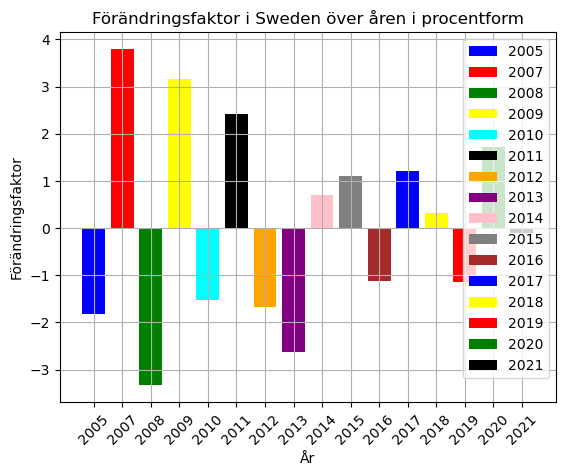

In [6]:

land = input("Ange landet som ska presenteras:") # input från väljaren för landet

# tom lista att fylla med värden för landet
values = []
years = [] # tidsindex för åren
for row in WHR3Data[1:]: # Beräkna medelvärdet av 'Life Ladder' index för det valda landet
    if row[0] == land:
        values.append(float(row[2]))
        years.append(row[1])
        
medel = sum(values) / len(values) # Använder sum här då jag visat i tidigare uppgifter att jag kan för hand(stog inget i den här uppgiften)
print(f"Medelvärdet av 'Life Ladder' index för {land} är: {medel:.1f}") # printar ut medelvärdet

# Skapar linjediagrammet
plt.plot(years, values, label=land)
plt.xlabel('År') # lägger till tilar 
plt.ylabel('Life Ladder')
plt.title(f"'Life Ladder' index för {land} (2005-2022)")
plt.xticks(rotation=45) 
plt.grid() # lägger till grid
plt.show()


change = []
# Beräkna förändringsfaktorn för 'Life Ladder' index för landet
for i in range(1, len(values)):# Itirerar över alla värden
    factor = ((values[i] - values[i-1]) / values[i-1]) *100 
    change.append(factor)

# Skapa tabell för förändringsfaktorerna
tabell_titel = ['År',f'Score för {land}','Förändringsfaktor'] # titlar
tabell_data = list(zip(years,values,change)) # Slår ihop datat i samma lista
# printar tabellen
print(f"{tabell_titel[0]:<12} {tabell_titel[1]:<30} {tabell_titel[2]:<20}")
print('-' * 65)
for stat in tabell_data: # Itererar ut värden för kolumnerna
    print(f'| {stat[0]:8} | {stat[1]:20.3f} | {stat[2]:20.2f}') # avrundat till olika antal decimaler
    print("+----------+----------------------+----------------------------+")
    

    
# Stapeldiagrammet 

# Färgschema
col = ['blue','red','green','yellow','cyan','black','orange','purple','pink','grey','brown','blue','yellow','red','green','black','cyan']

bar = plt.bar(years[:-1], change, color=col)
plt.xticks(rotation=45) # roterar x-ticksen
# Titlar på axlar och hela grafen
plt.xlabel('År')
plt.ylabel('Förändringsfaktor')
plt.title(f'Förändringsfaktor i {land} över åren i procentform')
plt.legend(handles = bar, labels = years[:-1],loc='best')# lägger till legenden med färgerna för åren(blir klottrigt)
plt.grid()
plt.show()
